# **Regression Prediction on Work Life Balance Score**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('.\Wellbeing_and_lifestyle_data_Kaggle.csv')
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


## Data Understanding

In [107]:
print("Shape: ", '\n', df.shape, '\n')
print("Data Information: ", '\n', df.info(), '\n')
print("Total Number of Missing Value: ", "\n", df.isna().sum(), '\n')
print("Total Number of Duplicated rows: ", "\n", df.duplicated().sum())

Shape:  
 (15972, 24) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14

## Data Cleaning

In [108]:
df = df.drop_duplicates()
print("Shape after drop the duplicated rows: ", df.shape)

Shape after drop the duplicated rows:  (15490, 24)


In [109]:
print("Unique value in DAILY_STRESS: ", '\n', df['DAILY_STRESS'].unique(), '\n')
print("Unique value in AGE: ", '\n', df['AGE'].unique(), '\n')
print("Unique value in GENDER: ", '\n', df['GENDER'].unique())

Unique value in DAILY_STRESS:  
 ['2' '3' '1' '4' '5' '0' '1/1/00'] 

Unique value in AGE:  
 ['36 to 50' '51 or more' '21 to 35' 'Less than 20'] 

Unique value in GENDER:  
 ['Female' 'Male']


In [110]:
# Check the number of records before deletion
print("Rows before deletion:", len(df))

# Remove rows where 'daily_stress' equals '1/1/00'
df = df[df['DAILY_STRESS'] != '1/1/00']

# Check the number of records after deletion
print("Rows after deletion:", len(df))

Rows before deletion: 15490
Rows after deletion: 15489


## Data Transformation

In [111]:
# Change datatype from object to int64
df['DAILY_STRESS'] = df['DAILY_STRESS'].astype('int64')

## Data Reduction

In [3]:
df = df.drop(columns=['Timestamp'])

In [113]:
df.shape

(15489, 23)

In [114]:
df.describe()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,...,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000,15489.000000
mean,2.922461,2.792304,5.226096,5.513397,5.619214,6.489380,4.000129,2.716186,1.409000,5.749629,...,5.715927,3.752211,7.038543,2.891536,2.924075,1.730518,5.710117,3.321002,6.222932,666.840216
std,1.443403,1.369373,3.315673,2.839107,3.244255,3.084892,2.760358,1.851407,0.491665,2.623192,...,2.887192,3.226062,1.198958,3.686636,2.676042,0.443705,3.091143,2.728172,3.017481,45.002570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,...,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,...,6.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,6.000000,667.900000
75%,4.000000,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,...,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


## Data Visualization
- Pie Chart for the Categorical Variables.
- Histogram and Boxplot for the Numerical Variables.
- Scatter Plot: Numerical features vs 'WORK_LIFE_BALANCE_SCORE'.

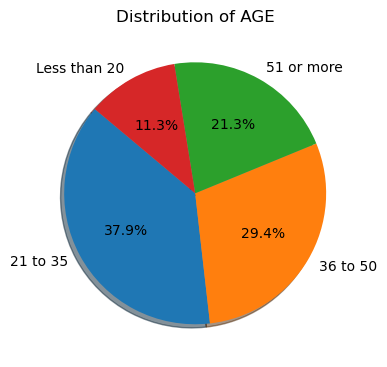

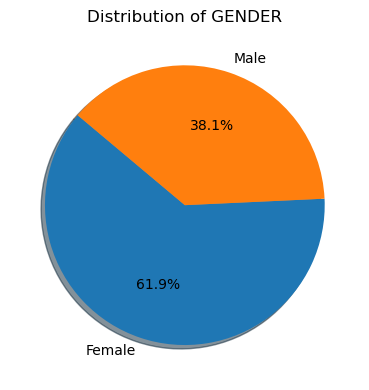

In [115]:
categorical_cols = ["AGE", "GENDER"]

for col in categorical_cols:
    plt.figure(figsize=(4,4))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, shadow=True)
    plt.title(f"Distribution of {col}")
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

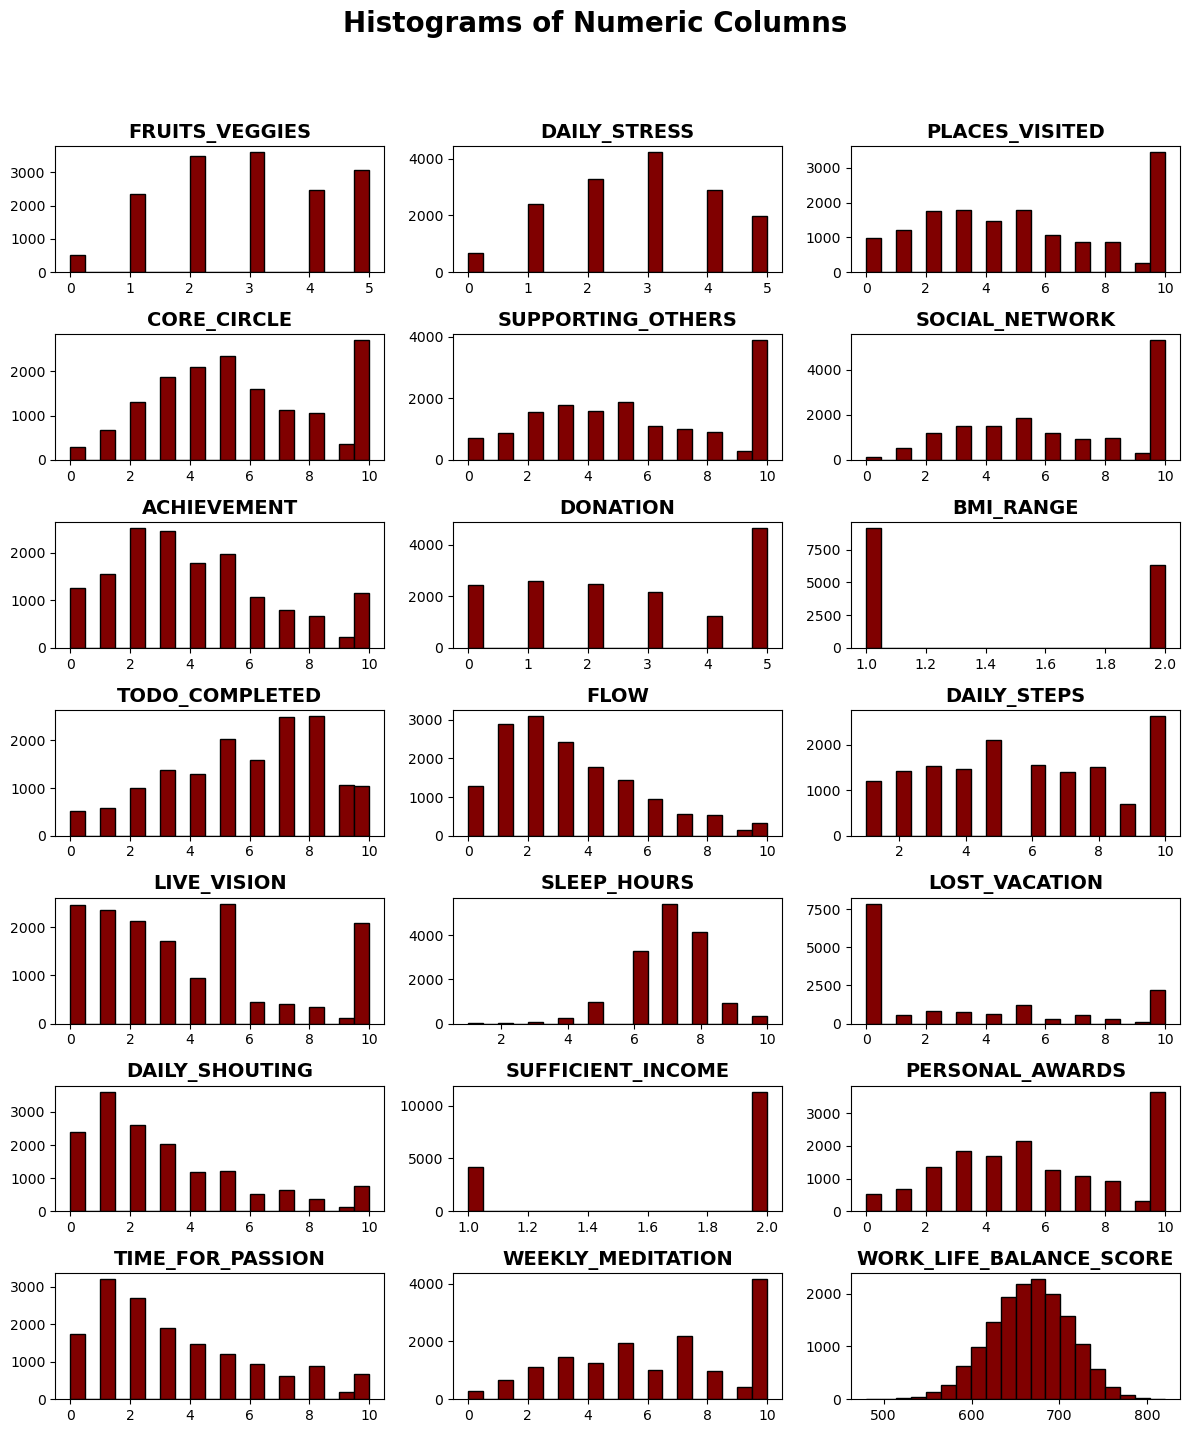

In [116]:
numeric_cols = df.select_dtypes(include='number').columns
n_rows = (len(numeric_cols) + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(12, n_rows * 2))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    df[col].hist(ax=axes[i], bins=20, color='maroon', edgecolor='black')
    axes[i].set_title(col, fontsize=14, weight='bold')
    axes[i].tick_params(axis='both', labelsize=10)
    axes[i].grid(False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histograms of Numeric Columns", fontsize=20, weight='bold', y=1.02)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

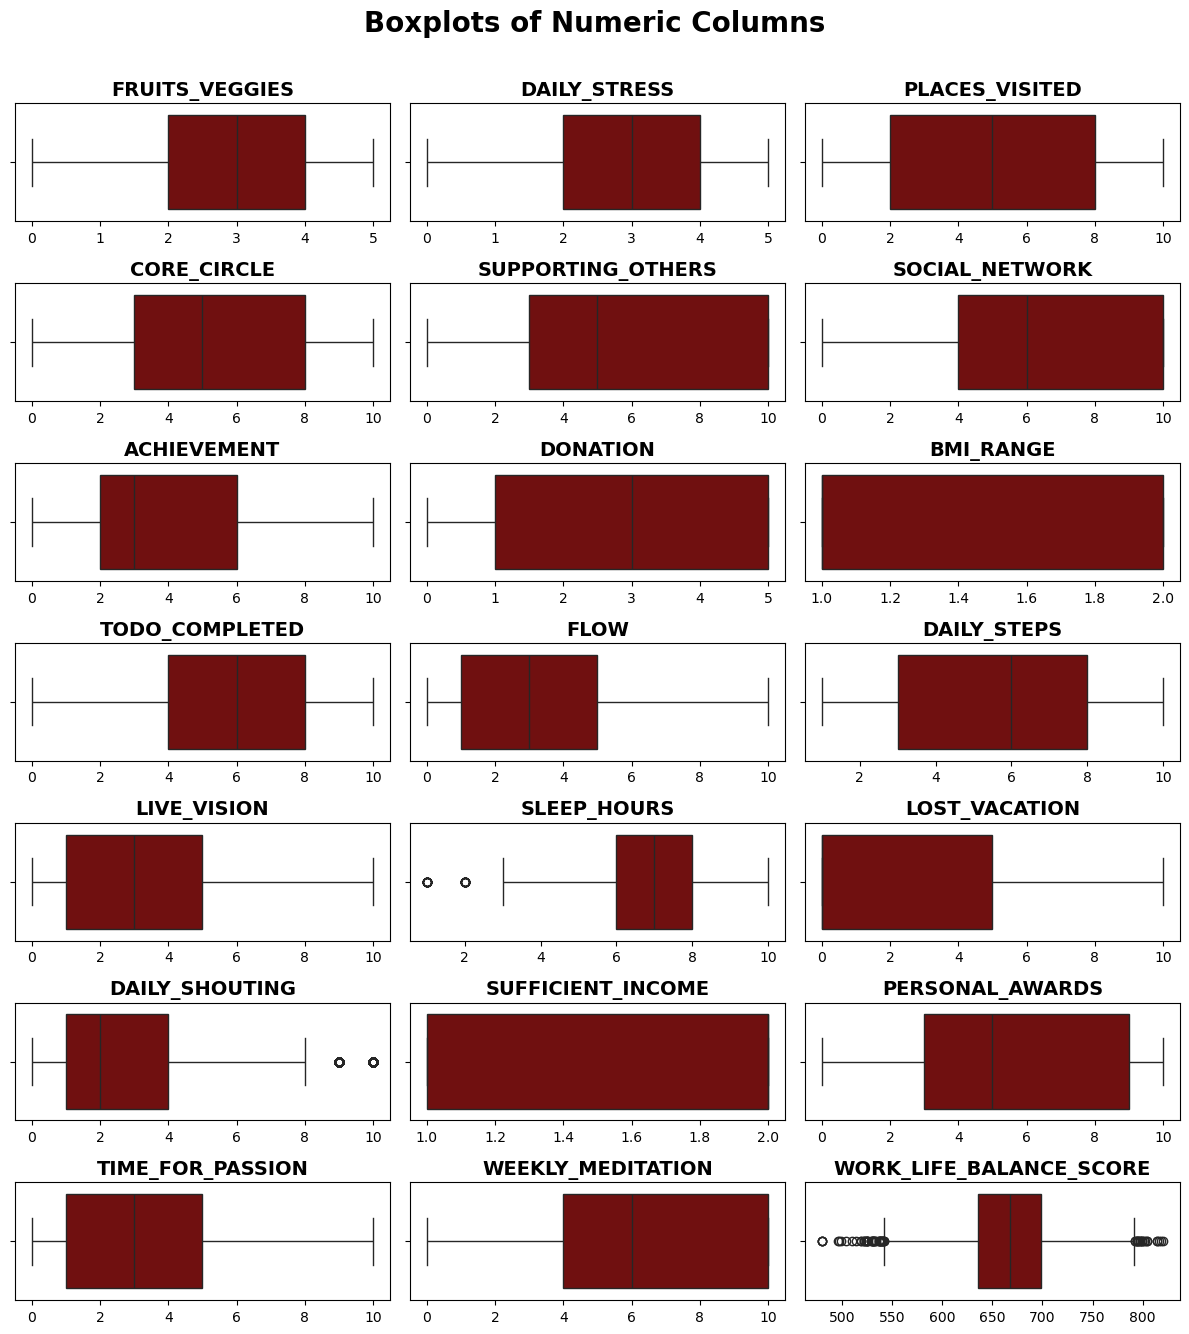

In [117]:
numeric_cols = df.select_dtypes(include=['number']).columns
n_rows = (len(numeric_cols) + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(12, n_rows * 2))
axes = axes.flatten()

# Create boxplots for valid numeric columns
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i], color="maroon")
    axes[i].set_title(col, fontsize=14, weight='bold')
    axes[i].set_xlabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Boxplots of Numeric Columns", fontsize=20, weight='bold', y=0.95)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

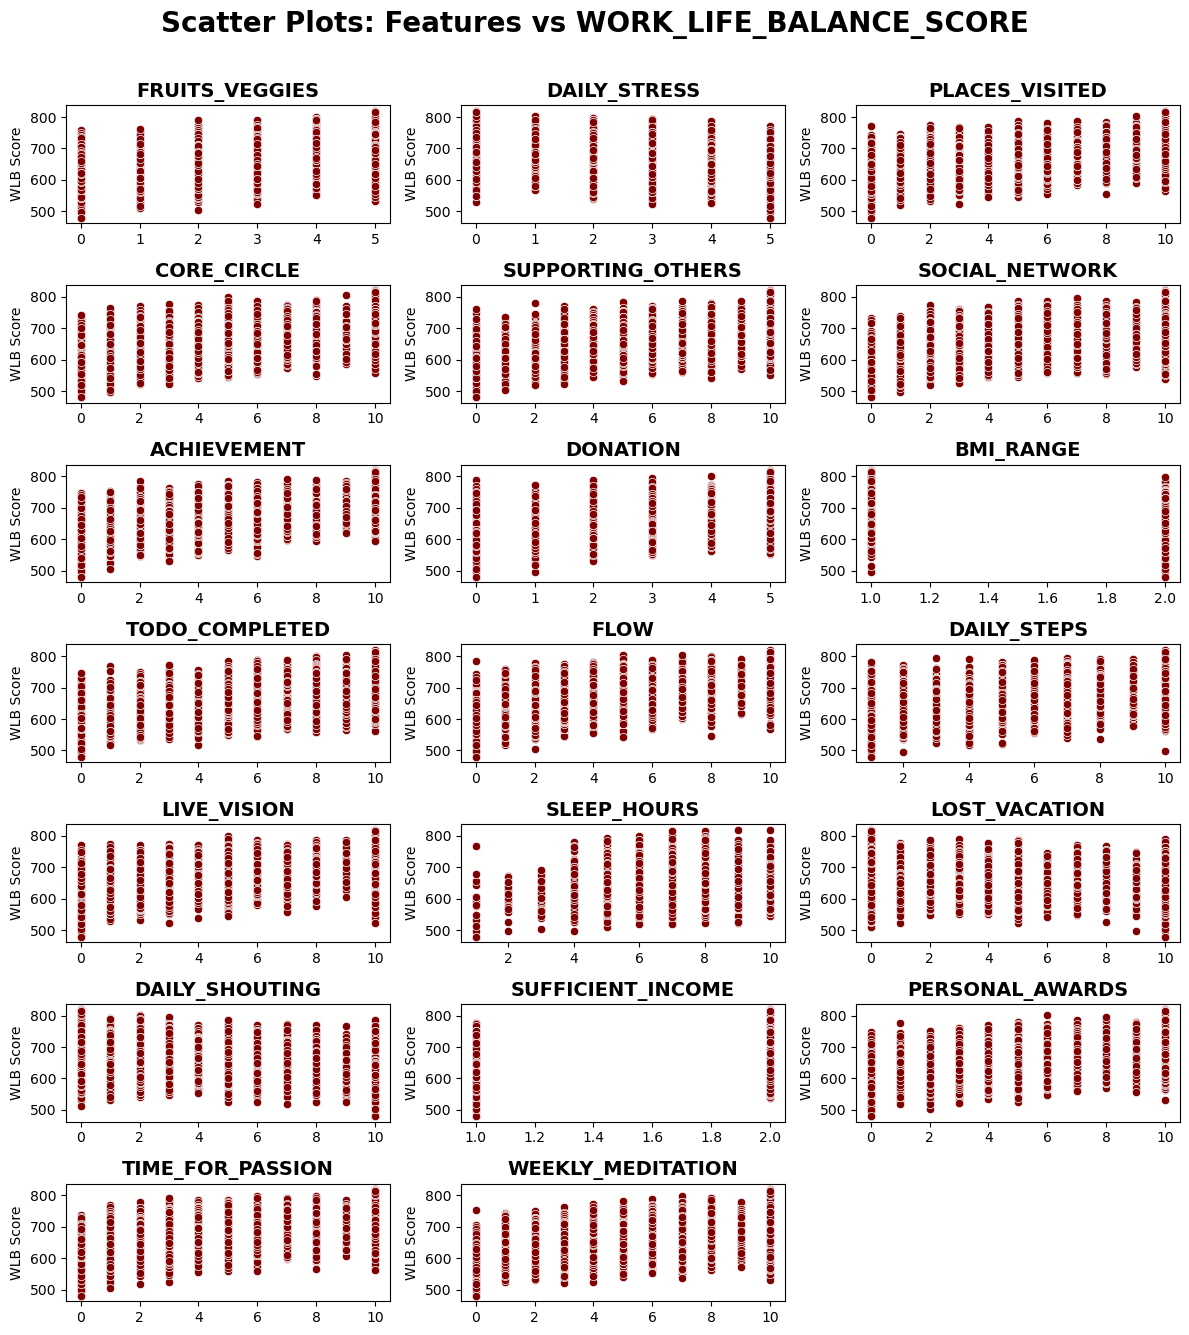

In [118]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
if "WORK_LIFE_BALANCE_SCORE" in numeric_cols:
    numeric_cols.remove("WORK_LIFE_BALANCE_SCORE")

n_rows = (len(numeric_cols) + 2) // 3 
fig, axes = plt.subplots(n_rows, 3, figsize=(12, n_rows * 2))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.scatterplot(x=df[col], y=df["WORK_LIFE_BALANCE_SCORE"], ax=axes[i], color="maroon")
    axes[i].set_title(col, fontsize=14, weight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("WLB Score")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Scatter Plots: Features vs WORK_LIFE_BALANCE_SCORE", fontsize=20, weight='bold', y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

## Train Test split

In [119]:
x = df.drop(columns=['WORK_LIFE_BALANCE_SCORE'])
y = df['WORK_LIFE_BALANCE_SCORE']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (12391, 22)
Shape of x_test:  (3098, 22)
Shape of y_train:  (12391,)
Shape of y_test:  (3098,)


## Data preprocessing before Predition
- One-Hot-Encoding applied on the categorical columns "AGE" and "GENDER" and Standard Scaler applied on the numerical columns.
- Numerical columns select the columns that contains the variables with the datatype of **'int64'**.

In [120]:
categorical_cols = ["AGE", "GENDER"]
numerical_cols = df.select_dtypes('int64').columns.tolist()

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

x_train_cat = pd.DataFrame(ohe.fit_transform(x_train[categorical_cols]), 
                              columns=ohe.get_feature_names_out(categorical_cols),
                              index=x_train.index)

x_test_cat = pd.DataFrame(ohe.transform(x_test[categorical_cols]), 
                             columns=ohe.get_feature_names_out(categorical_cols),
                             index=x_test.index)

x_train_num = pd.DataFrame(scaler.fit_transform(x_train[numerical_cols]),
                              columns=numerical_cols,
                              index=x_train.index)

x_test_num = pd.DataFrame(scaler.transform(x_test[numerical_cols]),
                             columns=numerical_cols,
                             index=x_test.index)

x_train_processed = pd.concat([x_train_num, x_train_cat], axis=1)
x_test_processed = pd.concat([x_test_num, x_test_cat], axis=1)
print("Shape of x_train_processed: ", x_train_processed.shape)
print("Shape of x_test_processed: ", x_test_processed.shape)

Shape of x_train_processed:  (12391, 26)
Shape of x_test_processed:  (3098, 26)


#### Linear Regression Model

In [121]:
model_lr = LinearRegression()
model_lr.fit(x_train_processed, y_train)

# Predit the Training data
y_train_pred = model_lr.predict(x_train_processed)

r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

print("Performance Metrics for Training Data:")
print(f"R² Score: {r2_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}", '\n')

# Predict the Testing Data
y_pred_lr = model_lr.predict(x_test_processed)

r2 = r2_score(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lr)

print("Performance Metrics for Testing Data")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Performance Metrics for Training Data:
R² Score: 1.0000
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Absolute Error (MAE): 0.0000 

Performance Metrics for Testing Data
R² Score: 1.0000
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Absolute Error (MAE): 0.0000


- Linear Regression model has R² = 1.000 and 0 error, this is suspicious and almost certainly invalid. There are many features with moderate correlations, and a few features with very low or no correlation to the target.

In [122]:
train_merged = pd.concat([x_train_processed, y_train], axis=1)
train_merged.columns

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION',
       'AGE_21 to 35', 'AGE_36 to 50', 'AGE_51 or more', 'AGE_Less than 20',
       'GENDER_Female', 'GENDER_Male', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

#### Perform Feature Selection for Linear Regression Model
- Select only features that are strongly correlated with the target (WORK_LIFE_BALANCE_SCORE), with an absolute correlation threshold like |corr| > 0.35.
- Reduces complexity and helps the model generalize better to unseen data.
- Removing irrelevant or redundant features can boost model accuracy.
- Simpler models with fewer features are easier to explain and understand.

#### Correlation Heatmap for the numerical variables

Number of Features selected:  16
Selected Features based on correlation:
 ['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION']


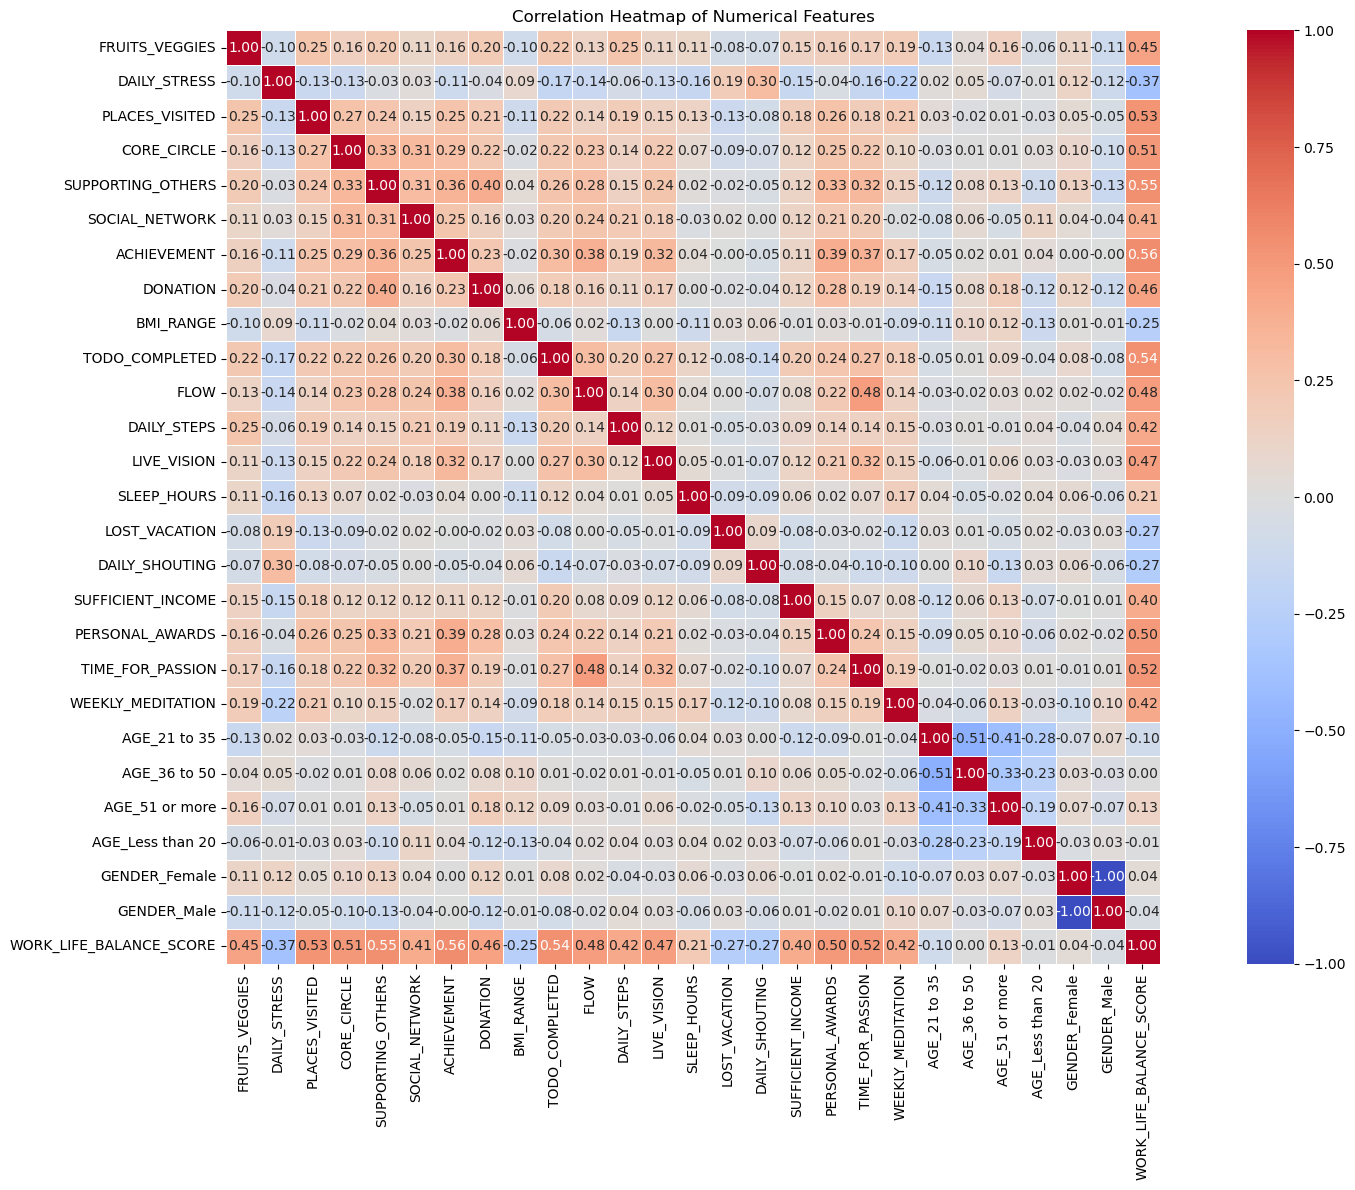

In [123]:
numeric_cols = train_merged.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

# Extract correlations with the target variable (WORK_LIFE_BALANCE_SCORE)
target_corr = corr_matrix['WORK_LIFE_BALANCE_SCORE'].drop('WORK_LIFE_BALANCE_SCORE')
selected_features = target_corr[abs(target_corr) > 0.35].index.tolist()
print("Number of Features selected: ", len(selected_features))
print("Selected Features based on correlation:\n", selected_features)

plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

In [124]:
x_train_processed_fs = x_train_processed[selected_features]
x_test_processed_fs = x_test_processed[selected_features]

model_lr2 = LinearRegression()
model_lr2.fit(x_train_processed_fs, y_train)

# Predit the Training data
y_train_pred = model_lr2.predict(x_train_processed_fs)

r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

print("Performance Metrics for Training Data:")
print(f"R² Score: {r2_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}", '\n')

# Predict the Testing Data
y_pred_lr = model_lr2.predict(x_test_processed_fs)

r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Performance Metrics for Testing Data")
print(f"R² Score: {r2_lr:.4f}")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")

Performance Metrics for Training Data:
R² Score: 0.9343
Mean Squared Error (MSE): 132.9263
Root Mean Squared Error (RMSE): 11.5294
Mean Absolute Error (MAE): 9.5656 

Performance Metrics for Testing Data
R² Score: 0.9347
Mean Squared Error (MSE): 132.7543
Root Mean Squared Error (RMSE): 11.5219
Mean Absolute Error (MAE): 9.5252


#### Model Evaluation with Chart
- Predicted vs Actual plots
- Residual plots

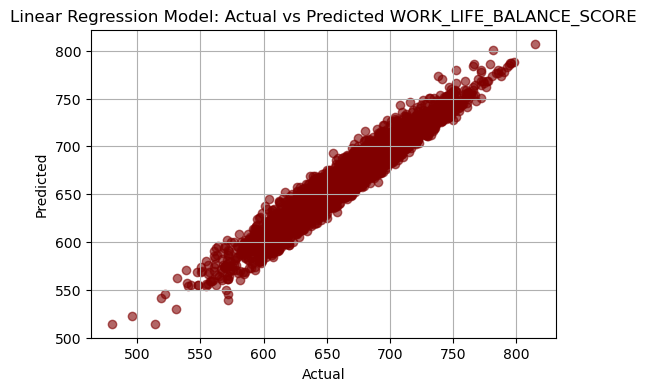

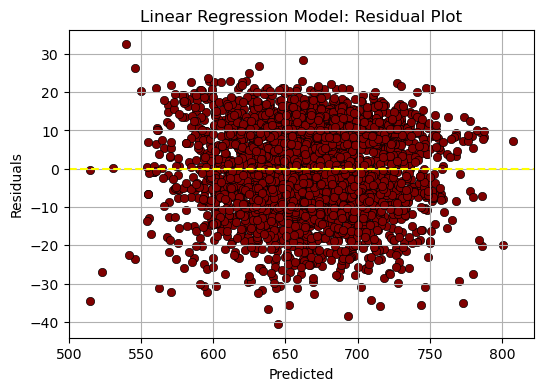

In [125]:
# Predicted vs Actual
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='maroon')
plt.title("Linear Regression Model: Actual vs Predicted WORK_LIFE_BALANCE_SCORE")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()

# Residual
residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_lr, y=residuals_lr, color='Maroon', edgecolor='k')
plt.axhline(0, color='yellow', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Linear Regression Model: Residual Plot')
plt.grid(True)
plt.show()

#### Random Forest Model

In [136]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(x_train_processed, y_train)

y_pred_rf = model_rf.predict(x_test_processed)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"R² Score: {r2_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")

R² Score: 0.9361
Mean Squared Error (MSE): 129.9958
Root Mean Squared Error (RMSE): 11.4016
Mean Absolute Error (MAE): 8.9482


#### Model Evaluation with Chart
- Predicted vs Actual plots
- Residual plots
- Feature Important Chart

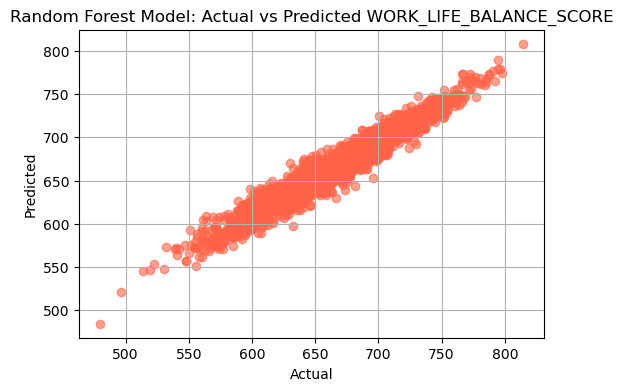

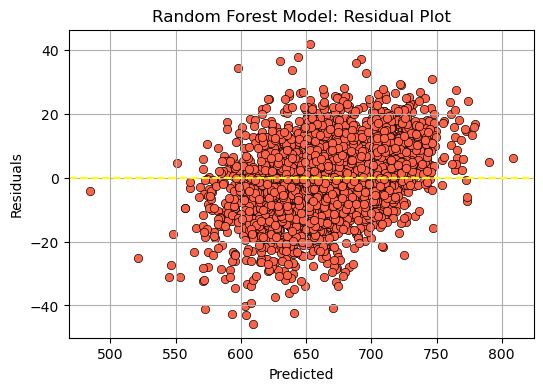

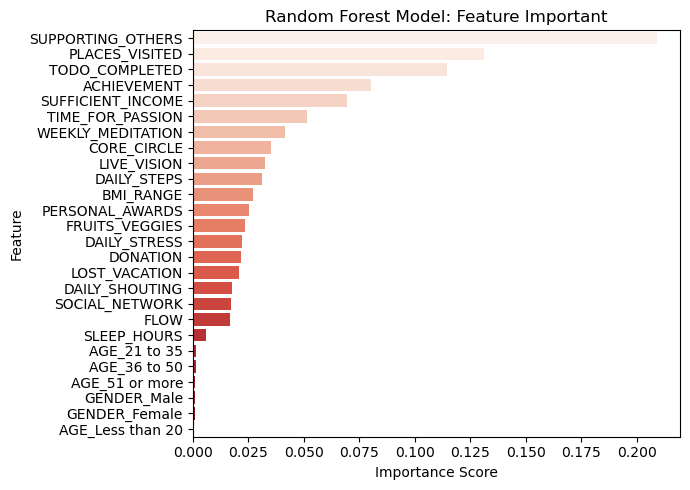

In [127]:
# Predicted vs Actual
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='tomato')
plt.title("Random Forest Model: Actual vs Predicted WORK_LIFE_BALANCE_SCORE")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()

# Residual
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_rf, y=residuals_rf, color='tomato', edgecolor='k')
plt.axhline(0, color='yellow', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Random Forest Model: Residual Plot')
plt.grid(True)
plt.show()

# Features Important
importances = model_rf.feature_importances_

feature_names = x_train_processed.columns
feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(7, 5))
sns.barplot(data=feat_importances, x='Importance', y='Feature', palette='Reds', hue='Feature', legend=False, dodge=False)
plt.title('Random Forest Model: Feature Important')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



#### XGBoost Model

In [137]:
model_xg = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0)
model_xg.fit(x_train_processed, y_train)

y_pred_xg = model_xg.predict(x_test_processed)

r2_xg = r2_score(y_test, y_pred_xg)
mse_xg = mean_squared_error(y_test, y_pred_xg)
rmse_xg = np.sqrt(mse_xg)
mae_xg = mean_absolute_error(y_test, y_pred_xg)

print(f"R² Score: {r2_xg:.4f}")
print(f"Mean Squared Error (MSE): {mse_xg:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xg:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xg:.4f}")

R² Score: 0.9824
Mean Squared Error (MSE): 35.8209
Root Mean Squared Error (RMSE): 5.9851
Mean Absolute Error (MAE): 4.6912


#### Model Evaluation with Chart
- Predicted vs Actual plots
- Residual plots
- Feature Important Chart

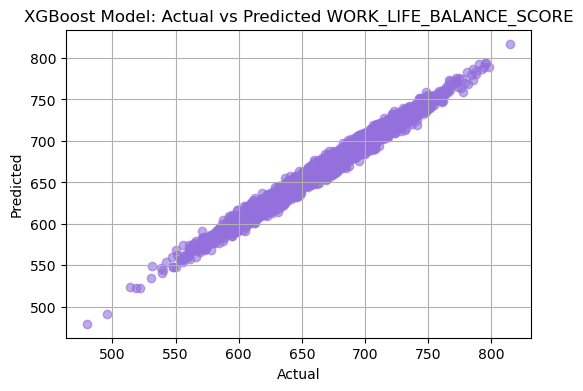

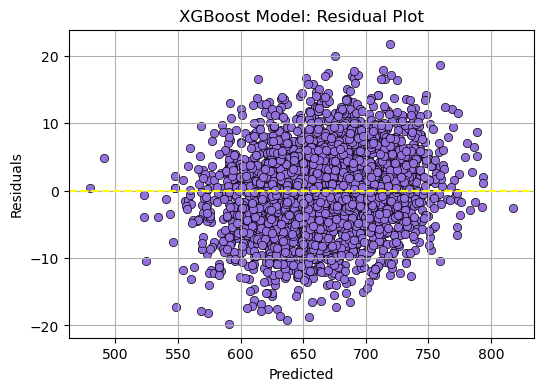

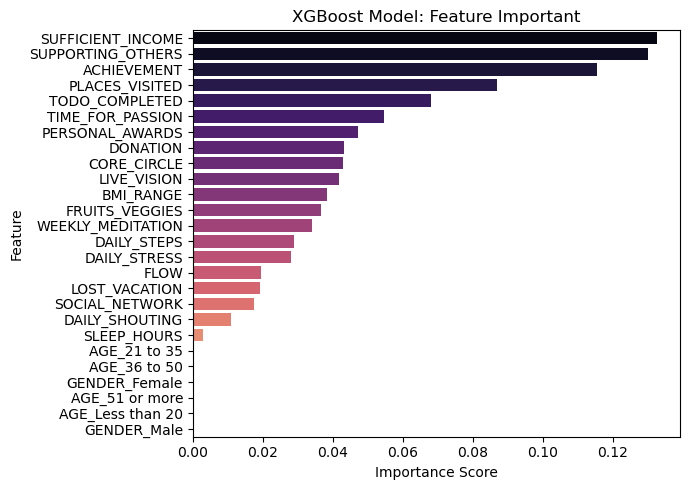

In [129]:
# Predicted vs Actual
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_xg, alpha=0.6, color='mediumpurple')
plt.title("XGBoost Model: Actual vs Predicted WORK_LIFE_BALANCE_SCORE")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()

# Residual
residuals_xg = y_test - y_pred_xg
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_xg, y=residuals_xg, color='mediumpurple', edgecolor='k')
plt.axhline(0, color='yellow', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('XGBoost Model: Residual Plot')
plt.grid(True)
plt.show()

# Feature Important
importances = model_xg.feature_importances_
feature_names = x_train_processed.columns

feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(7, 5))
sns.barplot(data=feat_importances, x='Importance', y='Feature', palette='magma', hue='Feature', legend=False, dodge=False)
plt.title('XGBoost Model: Feature Important')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### Comparison Table of Performance Metrics with 3 different Models

In [138]:
metrics_data = pd.DataFrame([
    {"Model": "Linear Regression", "R-Squared": r2_lr, "MSE": mse_lr, "RMSE": rmse_lr, "MAE": mae_lr},
    {"Model": "Random Forest", "R-Squared": r2_rf, "MSE": mse_rf, "RMSE": rmse_rf, "MAE": mae_rf},
    {"Model": "XGBoost", "R-Squared": r2_xg, "MSE": mse_xg, "RMSE": rmse_xg, "MAE": mae_xg}
])

print("Comparison Table of Performance Metrics with 3 different Models:")
metrics_data

Comparison Table of Performance Metrics with 3 different Models:


,Model,R-Squared,MSE,RMSE,MAE
0,Linear Regression,0.934737,132.754302,11.521905,9.525198
1,Random Forest,0.936093,129.995837,11.401572,8.948158
2,XGBoost,0.982390,35.820929,5.985059,4.691230


In [131]:
from IPython.display import display, HTML

display(HTML("<hr>")) 

## **Method with Pipeline + ColumnTransformer**

In [132]:
categorical_cols = ["AGE", "GENDER"]
numerical_cols = df.select_dtypes('int64').columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('Numerical', StandardScaler(), numerical_cols),
    ('Categorical', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

preprocessor

ColumnTransformer(transformers=[('Numerical', StandardScaler(),
                                 ['FRUITS_VEGGIES', 'DAILY_STRESS',
                                  'PLACES_VISITED', 'CORE_CIRCLE',
                                  'SUPPORTING_OTHERS', 'SOCIAL_NETWORK',
                                  'ACHIEVEMENT', 'DONATION', 'BMI_RANGE',
                                  'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
                                  'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION',
                                  'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
                                  'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
                                  'WEEKLY_MEDITATION']),
                                ('Categorical',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['AGE', 'GENDER'])])

#### Pipeline + ColumnTransfomer
- During **'.fit(x_train, y_train)'**, it: Calls **'.fit_transform()'** on the preprocessor using **'x_train'**. Then fits the regression model on the transformed training data.
- During **'.predict(x_test)'**, it: Calls **'.transform()'** on the preprocessor using **'x_test'**. Then uses the regression model to predict.

#### Linear Regression Model

In [133]:
model1 = Pipeline(steps=[
    ('Preprocessing', preprocessor),
    ('Regression', LinearRegression())
])
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R Squared Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R Squared Score: 1.0000
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Absolute Error (MAE): 0.0000


#### Random Forest Model

In [134]:
model2 = Pipeline(steps=[
    ('Preprocessing', preprocessor),
    ('Regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

r2 = r2_score(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred2)

print(f"R Squared Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R Squared Score: 0.9361
Mean Squared Error (MSE): 129.9958
Root Mean Squared Error (RMSE): 11.4016
Mean Absolute Error (MAE): 8.9482


#### XGBoost Model

In [135]:
model3 = Pipeline(steps=[
    ('Preprocessing', preprocessor),
    ('Regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0))
])
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)

r2 = r2_score(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred3)

print(f"R Squared Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R Squared Score: 0.9824
Mean Squared Error (MSE): 35.8209
Root Mean Squared Error (RMSE): 5.9851
Mean Absolute Error (MAE): 4.6912
